 # Olympics Project

**Abdullah Ibrahem Mohmmad AL-Mashny**

[Data in Kaggle](https://www.kaggle.com/heesoo37/120-years-of-olympic-history-athletes-and-results?select=athlete_events.csv)

### Import the libraries

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

### Read the data

In [10]:
from google.colab import files
uploaded = files.upload()

athletes = pd.read_csv("athlete_events.csv")
regions = pd.read_csv("noc_regions.csv")
df = pd.merge(athletes, regions, how="left", on="NOC")
df.head()



Saving noc_regions.csv to noc_regions (2).csv
Saving athlete_events.csv to athlete_events (1).csv


,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,Denmark,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN,Netherlands,NaN


### Don't forget to drop duplicates first

In [47]:
db= df.drop_duplicates()
print(db)

            ID                      Name Sex   Age  Height  Weight  \
0            1                 A Dijiang   M  24.0   180.0    80.0   
1            2                  A Lamusi   M  23.0   170.0    60.0   
2            3       Gunnar Nielsen Aaby   M  24.0     NaN     NaN   
3            4      Edgar Lindenau Aabye   M  34.0     NaN     NaN   
4            5  Christine Jacoba Aaftink   F  21.0   185.0    82.0   
...        ...                       ...  ..   ...     ...     ...   
271111  135569                Andrzej ya   M  29.0   179.0    89.0   
271112  135570                  Piotr ya   M  27.0   176.0    59.0   
271113  135570                  Piotr ya   M  27.0   176.0    59.0   
271114  135571        Tomasz Ireneusz ya   M  30.0   185.0    96.0   
271115  135571        Tomasz Ireneusz ya   M  34.0   185.0    96.0   

                  Team  NOC        Games  Year  Season            City  \
0                China  CHN  1992 Summer  1992  Summer       Barcelona   
1          

### Find the missing data in each column

In [14]:
md = df.isnull().sum()
print(md)

ID             0
Name           0
Sex            0
Age         9315
Height     58814
Weight     61527
Team           0
NOC            0
Games          0
Year           0
Season         0
City           0
Sport          0
Event          0
Medal     229959
region       370
notes     264696
dtype: int64


### Number of males and females

In [15]:
x= df['Sex'].value_counts()

print(x)

Sex
M    195353
F     74378
Name: count, dtype: int64


### How many cities do we have and what are they ?

In [46]:

unique = df['City'].unique()
num = len(unique)
print('Number of city is :', num)
print('Cities:', unique)

Number of city is : 42
Cities: ['Barcelona' 'London' 'Antwerpen' 'Paris' 'Calgary' 'Albertville'
 'Lillehammer' 'Los Angeles' 'Salt Lake City' 'Helsinki' 'Lake Placid'
 'Sydney' 'Atlanta' 'Stockholm' 'Sochi' 'Nagano' 'Torino' 'Beijing'
 'Rio de Janeiro' 'Athina' 'Squaw Valley' 'Innsbruck' 'Sarajevo'
 'Mexico City' 'Munich' 'Seoul' 'Berlin' 'Oslo' "Cortina d'Ampezzo"
 'Melbourne' 'Roma' 'Amsterdam' 'Montreal' 'Moskva' 'Tokyo' 'Vancouver'
 'Grenoble' 'Sapporo' 'Chamonix' 'St. Louis' 'Sankt Moritz'
 'Garmisch-Partenkirchen']


### Find the number of athlete for each year

In [18]:

y = df['Year'].value_counts()
print(y)

Year
1992    16413
1988    14676
2000    13821
1996    13780
2016    13688
2008    13602
2004    13443
2012    12920
1972    11959
1984    11588
1976    10502
1968    10479
1964     9480
1952     9358
1960     9235
1980     8937
1948     7383
1936     7146
1956     6434
1924     5570
1928     5238
2014     4891
2010     4402
2006     4382
1920     4292
2002     4109
1912     4040
1998     3605
1994     3160
1908     3069
1932     2817
1900     1898
1906     1733
1904     1301
1896      380
Name: count, dtype: int64


### Which athlete participated the most? (his/her name and ID)

In [45]:
ap = df.groupby(['Name', 'ID']).size()

most_participated_athlete = ap.idxmax()
most_participations = ap.max()

print(f"The athlete who participated the most is {most_participated_athlete[0]} with ID {most_participated_athlete[1]}, participating {most_participations} times.")


The athlete who participated the most is Heikki Ilmari Savolainen with ID 106296, participating 39 times.


### Find the number of each medal for each year.
##### The output should look like this
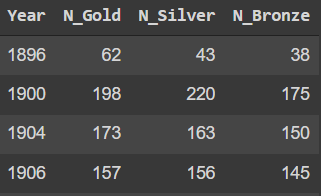

In [20]:
medals_years = df.groupby(['Year', 'Medal']).size().unstack(fill_value=0)
print(medals_years)


Medal  Bronze  Gold  Silver
Year                       
1896       38    62      43
1900      175   198     220
1904      150   173     163
1906      145   157     156
1908      256   294     281
1912      300   326     315
1920      367   493     448
1924      311   332     319
1928      281   275     267
1932      232   261     246
1936      330   348     347
1948      325   330     332
1952      347   351     335
1956      348   353     342
1960      357   359     342
1964      401   408     406
1968      421   425     410
1972      485   474     455
1976      518   508     505
1980      542   529     531
1984      576   571     551
1988      637   607     601
1992      710   663     657
1994      112   110     109
1996      629   608     605
1998      150   145     145
2000      680   663     661
2002      159   162     157
2004      677   664     660
2006      175   176     175
2008      710   671     667
2010      171   174     175
2012      679   632     630
2014      198   202 

### Provide all your answers with plots

### Find the number of winners with the gold medal in each city?

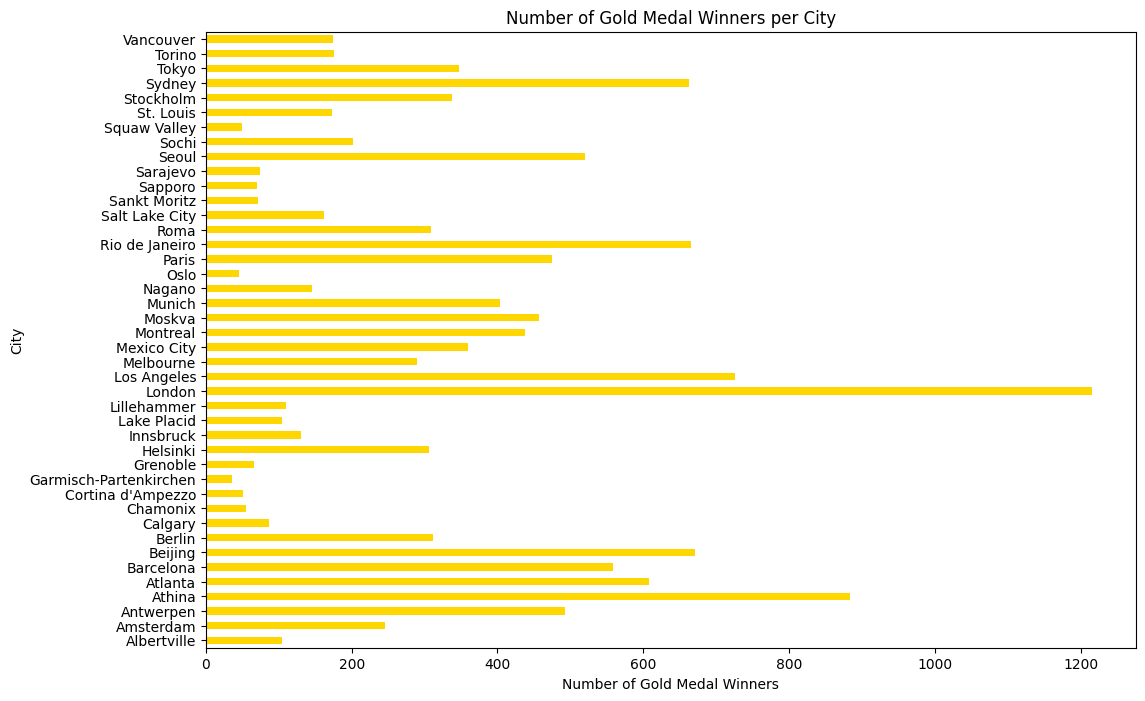

In [49]:
gold = df[df['Medal'] == 'Gold'].groupby('City').size()

plt.figure(figsize=(12, 8))
gold.plot(kind='barh', color='gold')
plt.title("Number of Gold Medal Winners per City")
plt.xlabel("Number of Gold Medal Winners")
plt.ylabel("City")
plt.xticks(rotation=360)
plt.show()

### Find the total missing data for each year?

<ipython-input-39-83f4d662b20b>:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  miss_data = df.groupby('Year').apply(lambda x: x.isnull().sum().sum())


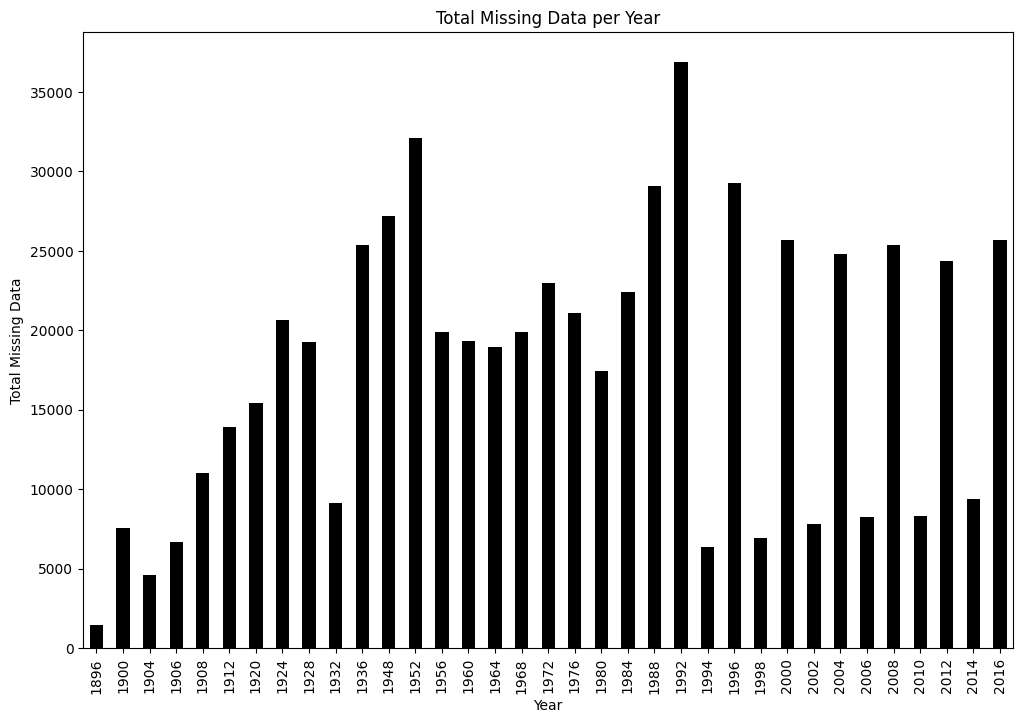

In [39]:
miss_data = df.groupby('Year').apply(lambda x: x.isnull().sum().sum())

plt.figure(figsize=(12, 8))
miss_data.plot(kind='bar', color='black')
plt.title("Total Missing Data per Year")
plt.xlabel("Year")
plt.ylabel("Total Missing Data")
plt.xticks(rotation=90)
plt.show()

### Dont use for loops, and provide all your answers with plots.

### Has the number of athletes changed over time for Summer and Winter?

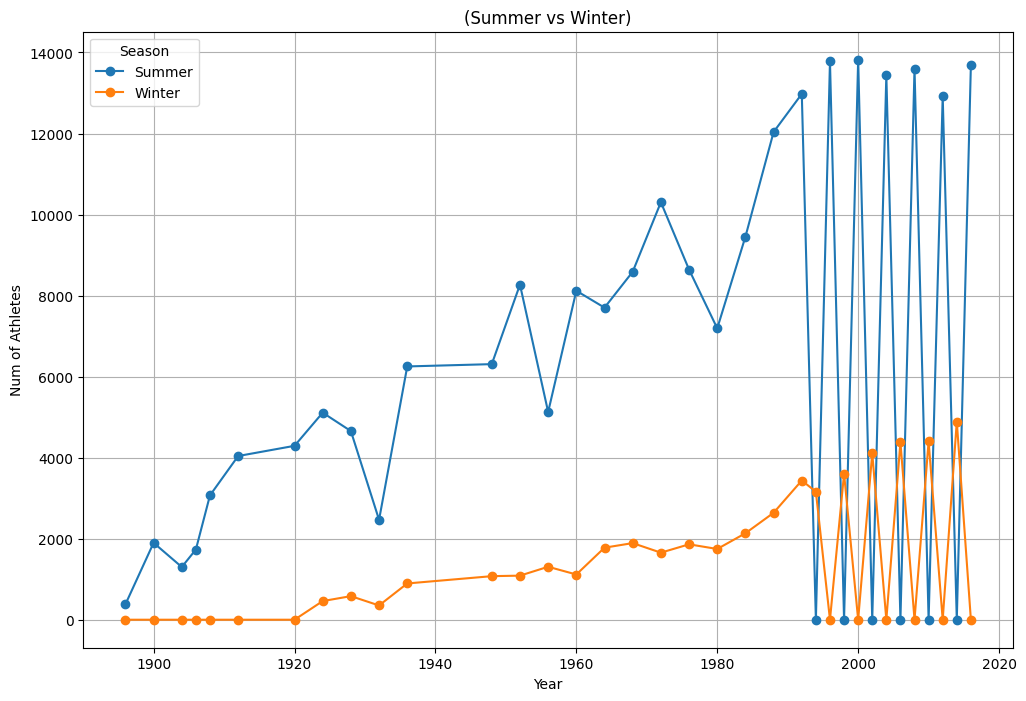

In [44]:

ay = df.groupby(['Year', 'Season']).size().unstack(fill_value=0)

ay.plot(kind='line', figsize=(12, 8), marker='o', linestyle='-', title="(Summer vs Winter)")
plt.xlabel("Year")
plt.ylabel("Num of Athletes")
plt.legend(title="Season", labels=["Summer", "Winter"])
plt.grid(True)
plt.show()
